<a href="https://colab.research.google.com/github/shazib07/ML/blob/main/1_Cats_vs_Dogs_Actual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#!pip install -U fastai
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

In [3]:
def is_cat(x): return x[0].isupper()

In [4]:
dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct = 0.2, seed = 42, label_func = is_cat, item_tfms=Resize(224))

In [5]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.165898,0.022245,0.010149,26:54


epoch,train_loss,valid_loss,error_rate,time
0,0.050897,0.025589,0.007442,35:58


In [7]:

import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

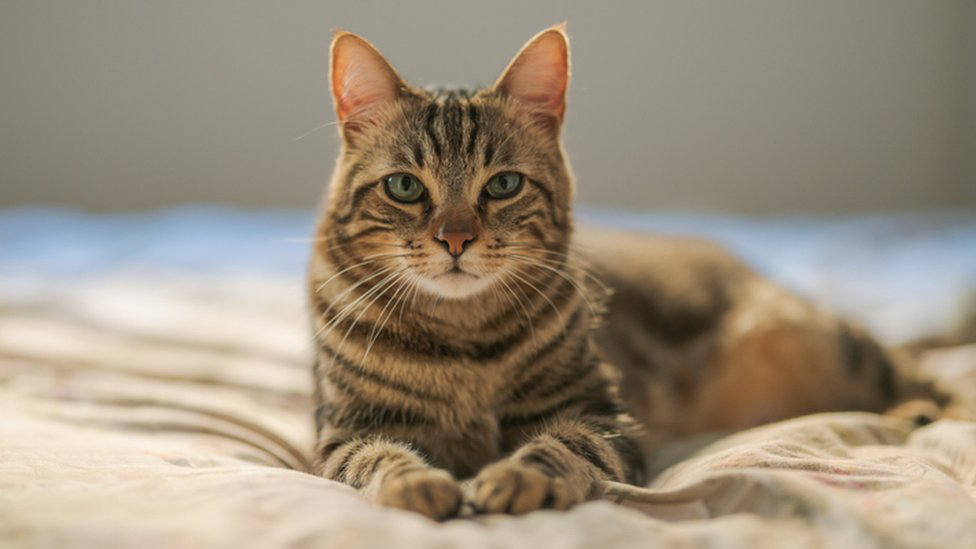

In [11]:
img = PILImage.create(uploader.data[0])
img

In [12]:
is_cat,_,probs = learn.predict(img)

In [13]:
print(f"is this a cat?: {is_cat}.")
print(f"Probability : {probs[1].item():.6f}")

is this a cat?: True.
Probability : 1.000000
